In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/sample_data/spam.csv",encoding='latin-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [11]:
df.sample(5)

,v1,v2
4204,spam,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...
50,ham,What you thinked about me. First time you saw ...
2442,ham,I donno if they are scorable
705,ham,I don't think I can get away for a trek that l...
1144,ham,Really... I tot ur paper ended long ago... But...


In [12]:
#renaming the columns

df.rename(columns={'v1': 'target', 'v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

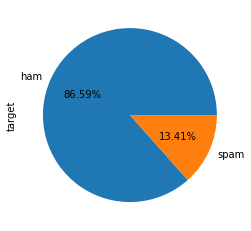

In [14]:
# pie plot
df['target'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.sample(5)

,target,text
5570,0,The guy did some bitching but I acted like i'd...
4670,0,"Probably not, I'm almost out of gas and I get ..."
4127,0,I dont thnk its a wrong calling between us
3418,1,Do you want a new Video phone? 600 anytime any...
3884,0,Like a personal sized or what


In [17]:
# cheking missing values again
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# we have 403 duplicates in our data, so we gonna remove them.

df = df.drop_duplicates(keep='first')

In [19]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
df.shape   #we have removed those 403 duplicates record

(5169, 2)

In [21]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
df['num_char'] = df['text'].apply(len) # gives us total number of characters

In [23]:
df.sample(5)

,target,text,num_char
3257,0,He fucking chickened out. He messaged me he wo...,115
2378,0,"Hi, Mobile no. &lt;#&gt; has added you in th...",158
530,1,PRIVATE! Your 2003 Account Statement for 07815...,146
732,0,Lol you won't feel bad when I use her money to...,80
1667,0,So now my dad is gonna call after he gets out ...,88


In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.sample(5)

,target,text,num_char,num_words
1775,0,Did u see what I posted on your Facebook?,41,10
1215,0,that would be good Û_ I'll phone you tomo lun...,85,19
1033,0,"OH MR SHEFFIELD! You wanna play THAT game, oka...",127,36
3801,0,No da. I am happy that we sit together na,41,11
4750,1,Your weekly Cool-Mob tones are ready to downlo...,160,41


In [26]:
#num of sentences
df['num_sen'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.sample(5)

,target,text,num_char,num_words,num_sen
4166,0,Are you at work right now ?,27,7,1
742,0,Just got up. have to be out of the room very s...,181,46,5
5034,0,How many times i told in the stage all use to ...,72,18,2
4080,0,Hurry home. Soup is DONE!,25,7,2
4797,0,Just come home. I don't want u to be miserable,46,12,2


In [28]:
df[['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
df[df['target']== 0][['num_char','num_words','num_sen']].describe()  #ham msg

,num_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
df[df['target']== 1][['num_char','num_words','num_sen']].describe()  #spam msg

,num_char,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


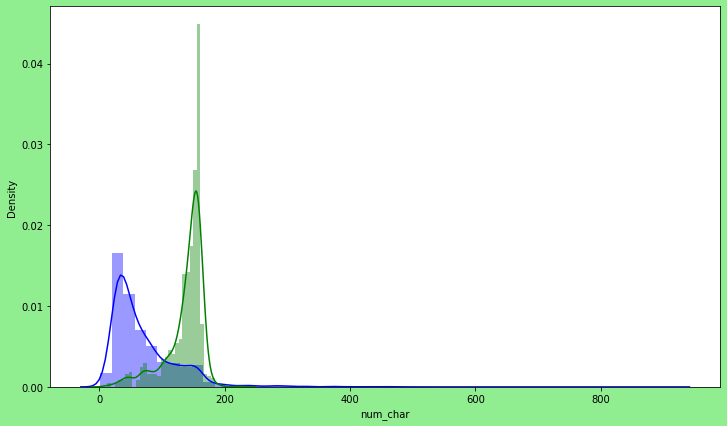

In [31]:
plt.figure(figsize=(12,7),facecolor='lightgreen')
sns.distplot(df[df['target'] == 0]['num_char'],color='blue')
sns.distplot(df[df['target'] == 1]['num_char'],color='green')

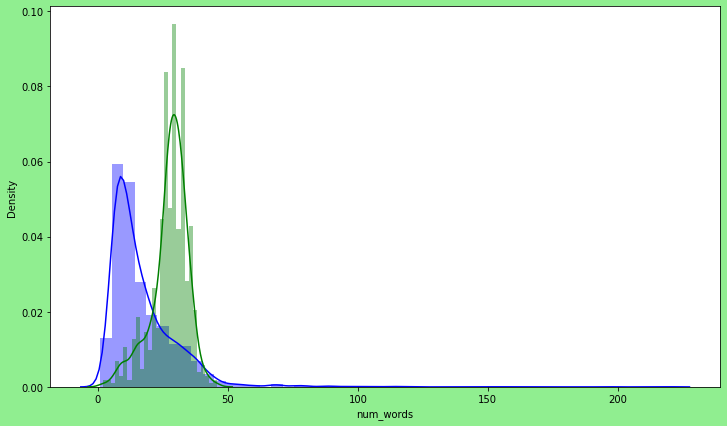

In [32]:
plt.figure(figsize=(12,7),facecolor='lightgreen')
sns.distplot(df[df['target'] == 0]['num_words'],color='blue')
sns.distplot(df[df['target'] == 1]['num_words'],color='green')

**Observation** :- 

*   The ham msg are consist of less number of words and character as compared to the spam msg.
*    whereas spam msg are consist of more no of words and character.



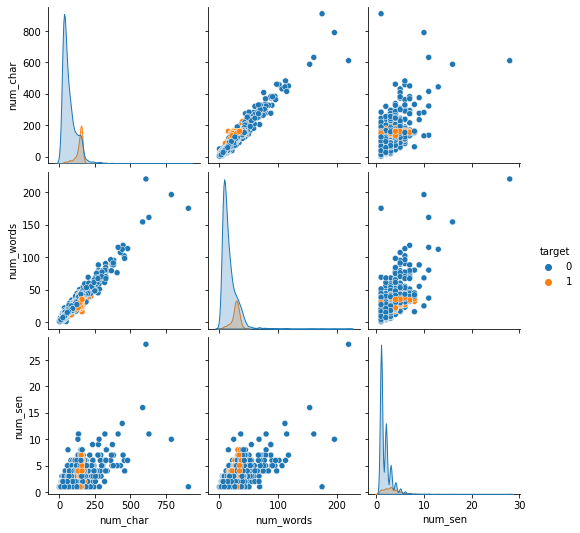

In [33]:

sns.pairplot(df, hue='target')

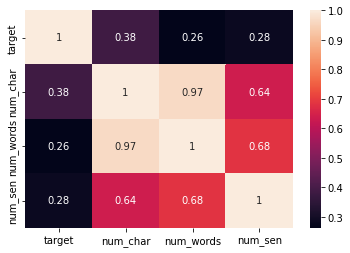

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)    

  text = y[:]
  y.clear()

  for i in text:
      y.append(ps.stem(i))    

  return " ".join(y)

In [72]:
transform_text("HELLO EVERYOne")

'hello everyone'

In [74]:
transform_text("HELLO EVERYOne")

['hello', 'everyone']

In [76]:
transform_text("HELLO EVERYOne %% $ &")

['hello', 'everyone']

In [83]:
transform_text("HELLO EVERYOne %% $ & did u love astrophysics ?")

['hello', 'everyone', 'u', 'love', 'astrophysics']

In [37]:
ps = PorterStemmer()
ps.stem('playing')

'play'

In [38]:
transform_text("HELLO EVERYOne %% $ & did u love astrophysics ? I loved the space-talks" )

'hello everyon u love astrophys love'

In [41]:
df['text'][34]

'Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged'

In [40]:
transform_text('Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged')

'thank subscript rington uk mobil charg pleas confirm repli ye repli charg'

In [43]:
 df['trans_text'] =df['text'].apply(transform_text)

In [94]:
df.sample(5)

,target,text,num_char,num_words,num_sen,trans_text
3085,0,I wish that I was with you. Holding you tightl...,153,37,5,wish hold tightli make see import much mean mu...
2505,0,Congrats kano..whr s the treat maga?,36,9,1,congrat kano whr treat maga
5177,0,Very strange. and are watching the 2nd one n...,86,21,3,strang watch 2nd one bed sweet dream miss u
2878,0,U still painting ur wall?,25,6,1,u still paint ur wall
4624,0,I'm on the bus. Love you,24,8,2,bu love


In [44]:
# Generating Wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=650,height=650)

In [45]:
spam_wc = wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

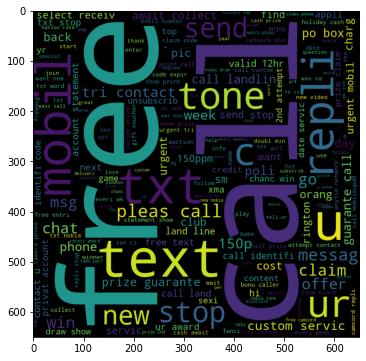

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))

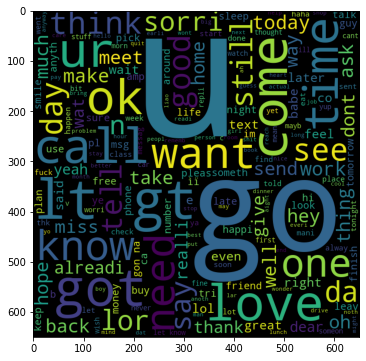

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [49]:
spam_corpus = []
for msg in df[df['target']==1]['trans_text'].tolist():
    for word in msg.split():
      spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

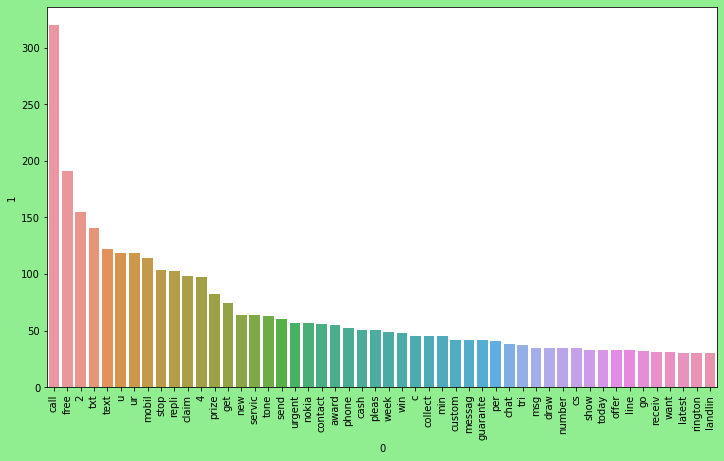

In [51]:
from collections import Counter
plt.figure(figsize=(12,7),facecolor='lightgreen')
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target']==0]['trans_text'].tolist():
    for word in msg.split():
       ham_corpus.append(word)

In [53]:
len(ham_corpus)

35394

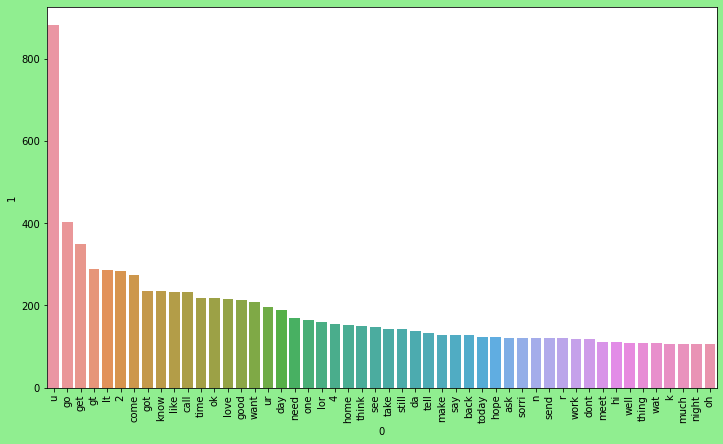

In [54]:
plt.figure(figsize=(12,7),facecolor='lightgreen')
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

**Model Building**

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()

In [56]:
x = tfidf.fit_transform(df['trans_text']).toarray()

In [57]:
x.shape

(5169, 6708)

In [58]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=1)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

**GaussianNB**

In [68]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_test_gb = gnb.predict(x_test)
y_pred_train_gb = gnb.predict(x_train)

In [69]:
#Accuracy score

accuracy_train_gb = accuracy_score(y_train,y_pred_train_gb)*100
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb) * 100
print('Accuracy of Training data =',accuracy_train_gb)
print("Accuracy of Test data =", accuracy_test_gb)

Accuracy of Training data = 92.45439469320065
Accuracy of Test data = 87.16956802063184


In [70]:
#Classification Report

print(classification_report(y_test,y_pred_test_gb))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1342
           1       0.52      0.81      0.63       209

    accuracy                           0.87      1551
   macro avg       0.74      0.85      0.78      1551
weighted avg       0.91      0.87      0.88      1551



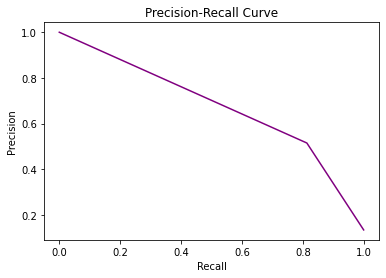

In [71]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_gb)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

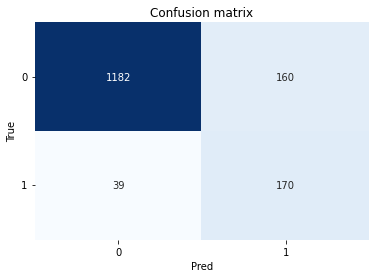

In [72]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test, y_pred_test_gb)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [74]:
# finding mean square error
from sklearn.metrics import mean_squared_error
MSE_gb = mean_squared_error(y_test,y_pred_test_gb)
GB_RMSE=np.sqrt(MSE_gb)
GB_RMSE

0.3581959237535814

**MultinomialNB**

In [77]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_test_mb = mnb.predict(x_test)
y_pred_train_mb =mnb.predict(x_train)


In [78]:
#accuracy score
accuracy_train_mb = accuracy_score(y_train,y_pred_train_mb)*100
accuracy_test_mb = accuracy_score(y_test,y_pred_test_mb)*100
print(f'accuracy of training data {accuracy_train_mb}')
print(f'accuracy of test data {accuracy_test_mb}')

accuracy of training data 97.0702045328911
accuracy of test data 94.51966473243068


In [79]:
#classification report
print(classification_report(y_test,y_pred_test_mb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1342
           1       1.00      0.59      0.74       209

    accuracy                           0.95      1551
   macro avg       0.97      0.80      0.86      1551
weighted avg       0.95      0.95      0.94      1551



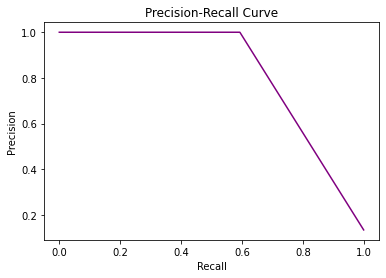

In [80]:
precision,recall,thresholds = precision_recall_curve(y_test,y_pred_test_mb)

fig, ax = plt.subplots()
ax.plot(recall,precision,color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

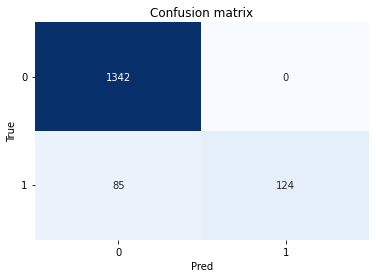

In [81]:
# confusion matrix
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test,y_pred_test_mb)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [83]:
#Rmse

MSE_mb = mean_squared_error(y_test,y_pred_test_mb)
MB_rmse = np.sqrt(MSE_mb)
print(MB_rmse)

0.23410115906524917


**BernoulliNB**

In [85]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_test_bb = bnb.predict(x_test)
y_pred_train_bb = bnb.predict(x_train)

In [86]:
#accuracy score 
accuracy_train_bb = accuracy_score(y_train,y_pred_train_bb)*100
accuracy_test_bb = accuracy_score(y_test,y_pred_test_bb)*100
print(f'accuracy of train bb {accuracy_train_bb}')
print(f'accuracy of test bb {accuracy_test_bb}')

accuracy of train bb 97.73355444997236
accuracy of test bb 96.06705351386202


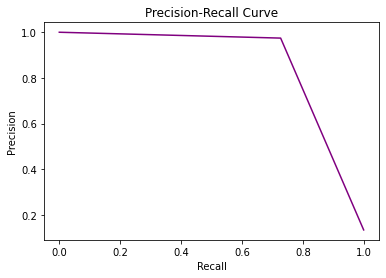

In [87]:
precision,recall,thresholds = precision_recall_curve(y_test,y_pred_test_bb)

fig, ax = plt.subplots()
ax.plot(recall,precision,color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

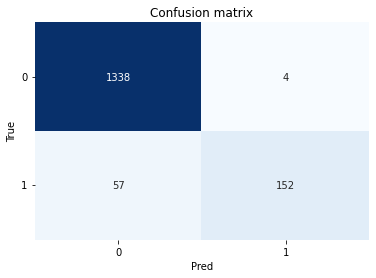

In [88]:
# Confusion matrix

classes = np.unique(y_test)
cm0 = confusion_matrix(y_test,y_pred_test_bb)
fig,ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [89]:
#Rmse 
MSE_bb = mean_squared_error(y_test,y_pred_test_bb)
BB_rmse = np.sqrt(MSE_bb)
print(BB_rmse)

0.19831657737410596


In [90]:
models = {}
models['GaussianNB']    = GaussianNB()
models['MultinomialNB'] = MultinomialNB()
models['BernoulliNB']   = BernoulliNB()

In [91]:
from sklearn.metrics import recall_score

accuracy, precision, recall  = {}, {}, {}  

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(x_train,y_train)
    
    # Make predictions on test dataset
    predictions = models[key].predict(x_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [92]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
GaussianNB,0.871696,0.813397,0.515152
MultinomialNB,0.945197,0.593301,1.000000
BernoulliNB,0.960671,0.727273,0.974359


In [93]:
result =pd.DataFrame({
    'Models':['GaussianNB','MultinomialNB','BernoulliNB'],
    'RMSE':[GB_RMSE,MB_rmse,BB_rmse]
})
result

,Models,RMSE
0,GaussianNB,0.358196
1,MultinomialNB,0.234101
2,BernoulliNB,0.198317


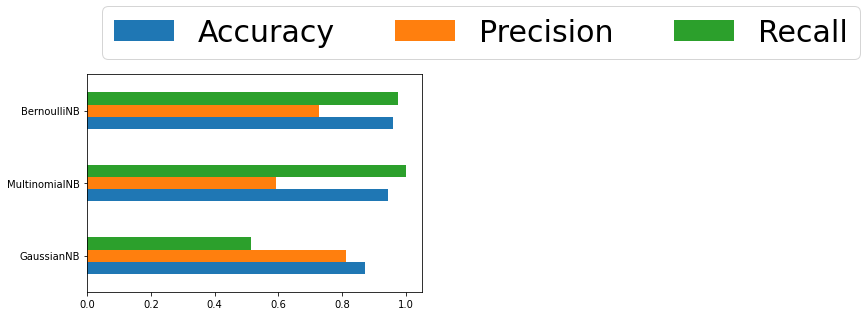

In [94]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 30}
)
plt.tight_layout()